Isabelle Mortillaro 2001590        

Step 1: Data Collection and Preparatory Dataframe Cleaning Process  

In [ ]:
import pandas as pd     
   
# Load the dataset 
dataframe = pd.read_csv('current.csv') 
dataframe  
  
# Reset the index
dataframe_reset= dataframe.drop(index=0)
dataframe_reset.reset_index(drop=True, inplace=True)
dataframe_reset

# Convert the sasdate column to datetime format
dataframe_reset['sasdate'] = pd.to_datetime(dataframe_reset['sasdate'], format='%m/%d/%Y')
type(dataframe_reset)


pandas.core.frame.DataFrame

In [34]:
import numpy as np

# Extract transformation codes
transformation_codes = dataframe.iloc[0, 1:].to_frame().reset_index()
transformation_codes.columns = ['Series', 'Transformation_Code']
transformation_codes

# Function to apply transformations based on the transformation code
def apply_transformation(series, code):
    if code == 1:
        # No transformation
        return series
    elif code == 2:
        # First difference
        return series.diff()
    elif code == 3:
        # Second difference
        return series.diff().diff()
    elif code == 4:
        # Log
        return np.log(series)
    elif code == 5:
        # First difference of log
        return np.log(series).diff()
    elif code == 6:
        # Second difference of log
        return np.log(series).diff().diff()
    elif code == 7:
        # Delta (x_t/x_{t-1} - 1)
        return series.pct_change()
    else:
        raise ValueError("Invalid transformation code")


In [35]:
# Apply the transformations to each column in dataframe_reset based on transformation_codes
for series_name, code in transformation_codes.values:
    dataframe_reset[series_name] = apply_transformation(dataframe_reset[series_name].astype(float), float(code))

dataframe_reset.head()


,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1959-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1959-02-01,0.003877,0.003621,0.010349,0.007336,0.007310,0.019395,0.013405,0.008628,0.007309,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1959-03-01,0.006457,0.007325,0.009404,-0.003374,0.008321,0.014300,0.006036,0.004896,0.000000,...,-0.001148,0.000292,-0.000022,-0.008147,0.004819,NaN,0.004929,0.004138,-0.014792,NaN
3,1959-04-01,0.006510,0.007029,-0.003622,0.019915,0.000616,0.021080,0.014339,0.014545,0.015652,...,0.001312,0.001760,-0.000022,0.012203,-0.004890,NaN,0.012134,0.006734,0.024929,NaN
4,1959-05-01,0.005796,0.006618,0.012043,0.006839,0.007803,0.014954,0.008267,0.009580,0.004766,...,-0.001695,-0.001867,-0.000021,-0.004090,-0.004819,NaN,0.002828,0.002020,-0.015342,NaN


In [36]:
# Clean the DataFrame by removing the rows with transformation codes
data_cleaned = dataframe_reset[2:] 
data_cleaned.reset_index(drop=True, inplace=True)
data_cleaned.head() 

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1959-03-01,0.006457,0.007325,0.009404,-0.003374,0.008321,0.014300,0.006036,0.004896,0.000000,...,-0.001148,0.000292,-0.000022,-0.008147,0.004819,NaN,0.004929,0.004138,-0.014792,NaN
1,1959-04-01,0.006510,0.007029,-0.003622,0.019915,0.000616,0.021080,0.014339,0.014545,0.015652,...,0.001312,0.001760,-0.000022,0.012203,-0.004890,NaN,0.012134,0.006734,0.024929,NaN
2,1959-05-01,0.005796,0.006618,0.012043,0.006839,0.007803,0.014954,0.008267,0.009580,0.004766,...,-0.001695,-0.001867,-0.000021,-0.004090,-0.004819,NaN,0.002828,0.002020,-0.015342,NaN
3,1959-06-01,0.003068,0.003012,0.003642,-0.000097,0.009064,0.001137,0.007035,0.007125,-0.004766,...,0.003334,0.001946,-0.004619,0.003992,0.004796,NaN,0.009726,0.009007,-0.012252,NaN
4,1959-07-01,-0.000580,-0.000762,-0.003386,0.012155,-0.000330,-0.024237,0.001168,0.008251,0.013056,...,-0.001204,-0.000013,0.000000,-0.004040,-0.004796,NaN,-0.004631,-0.001000,0.029341,NaN


Step 2: Parameters Estimation

In [37]:
# Check if INDPRO is correctly transformed in log differences 

# Target variable before applying the transformation
print(dataframe[['sasdate','INDPRO']])

# Target variable after applying the transformation based on transformation codes (code==5, first difference of log)
print(data_cleaned[['sasdate', 'INDPRO']])
#small numbers around zero, representing percentage changes  

# Summary statistics of INDPRO in log differences
print(data_cleaned['INDPRO'].describe())


        sasdate    INDPRO
0    Transform:    5.0000
1      1/1/1959   21.9616
2      2/1/1959   22.3917
3      3/1/1959   22.7142
4      4/1/1959   23.1981
..          ...       ...
788    8/1/2024  103.0135
789    9/1/2024  102.5969
790   10/1/2024  102.0854
791   11/1/2024  102.2549
792   12/1/2024  103.1942

[793 rows x 2 columns]
       sasdate    INDPRO
0   1959-03-01  0.014300
1   1959-04-01  0.021080
2   1959-05-01  0.014954
3   1959-06-01  0.001137
4   1959-07-01 -0.024237
..         ...       ...
785 2024-08-01  0.004810
786 2024-09-01 -0.004052
787 2024-10-01 -0.004998
788 2024-11-01  0.001659
789 2024-12-01  0.009144

[790 rows x 2 columns]
count    790.000000
mean       0.001934
std        0.009940
min       -0.142045
25%       -0.001806
50%        0.002434
75%        0.006371
max        0.063771
Name: INDPRO, dtype: float64


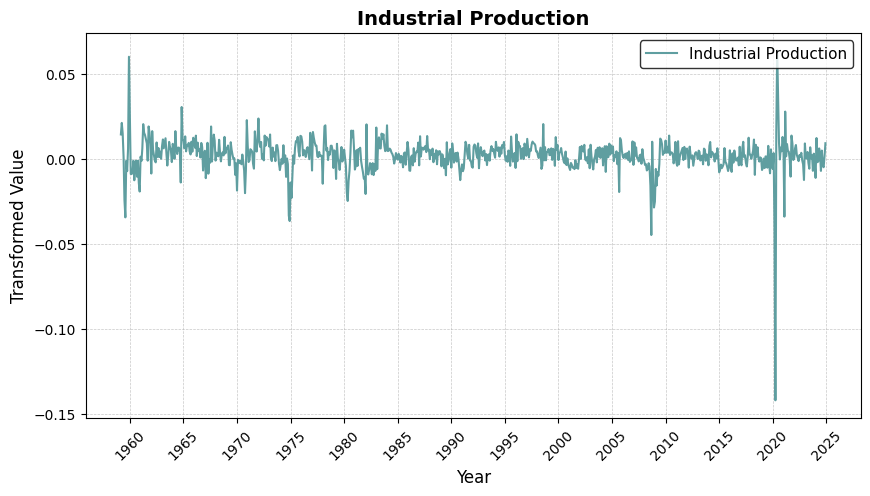

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define target variable for plotting
target_variable = 'INDPRO'
target_name = 'Industrial Production'

# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Convert dates to datetime format
dates = pd.to_datetime(data_cleaned['sasdate'], format='%m/%d/%Y')

# Plot the target variable
ax.plot(dates, data_cleaned[target_variable], label=target_name, color='cadetblue')

# Customize x-axis for better readability
ax.xaxis.set_major_locator(mdates.YearLocator(base=5))  # Tick every 5 years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as years

# Customize the plot
ax.set_title(target_name, fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Transformed Value', fontsize=12)

# Improve grid visibility
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add a legend with a slight background for readability
plt.legend(fontsize=11, loc="upper right", frameon=True, edgecolor="black")

# Show the plot
plt.show()

Maximum Likelihood Estimation of Model Parameters

Unconditional Log-Likelihood

In [ ]:
import numpy as np
import pandas as pd 
from scipy.optimize import minimize

def unconditional_likelihood(params, data, p):
    """
    Calculates the negative unconditional log-likelihood for an AR(p) model.
    Models also the first 2 observations using their unconditional distribution.

    params: list of parameters, where the first p are AR coefficients and the last is the noise variance.
    data: observed data.
    p: order of the AR model.
    """
    # AR coefficients and noise variance
    c, phi1, phi2, sigma2 = params
        
    # Calculate residuals
    T = len(data) 
    residuals = data[p:] - (c + phi1 * data[p-1:-1] + phi2 * data[p-2:-2])
    
    # Calculate negative log likelihood
    log_likelihood = (-T/2 * np.log(2 * np.pi * sigma2) - np.sum(residuals**2) / (2 * sigma2))
    
    return -log_likelihood


def estimate_ar_unc_parameters(data, p):
    """
    Estimates AR model parameters using maximum likelihood estimation.
    Uses L-BFGS-B for efficient optimization: 
    L-BFGS-B is a limited-memory algorithm for solving large nonlinear optimization problems 
    subject to simple bounds on the variables.

    data: observed data.
    p: order of the AR model.
    """
    # Initial parameters guess (small random values)
    params_initial = np.array([0, 0.5, 0.2, 0.01])  

    # Define bounds for all parameters
    bounds = [(-np.inf, np.inf), (-1, 1), (-1, 1), (1e-6, np.inf)]

    # Minimize the negative log likelihood
    result = minimize(unconditional_likelihood, params_initial, args=(data, p), 
                      bounds=bounds, method="L-BFGS-B") 
    
    if result.success:
        estimated_params = result.x
        return estimated_params
    else:
        raise Exception("Optimization failed:", result.message)
    
# Extract the log differences of INDPRO for estimation
indpro_log_diff = data_cleaned["INDPRO"].dropna().values

# Estimate AR(2) parameters using Unconditional MLE
params_unc_mle = estimate_ar_unc_parameters(indpro_log_diff, p=2)

# Create a DataFrame to display results
params_unc_mle_df = pd.DataFrame({
    "Parameters": ["c", "phi1", "phi2", "sigma2"],
    "MLE Estimates": params_unc_mle
})

# Display estimated parameters
print("\n\033[1m=== MLE Unconditional Estimated AR(2) Parameters ===\033[0m") # Bold Title 
print(params_unc_mle_df) 



=== MLE Unconditional Estimated AR(2) Parameters ===
  Parameters  MLE Estimates
0          c       0.001441
1       phi1       0.307154
2       phi2      -0.069482
3     sigma2       0.000089


OLS-equivalent estimation: maximizing the log-likelihood equates minimizing the residual sum of squares 

In [41]:
import numpy as np

def fit_ar_ols_xx(data, p):
    """
    data: observed data.
    p: order of the AR model.
    note: no constant
    """
    # Prepare the lagged data matrix
    T = len(data)
    Y = data[p:]  # Dependent variable (from p to end)
    X = np.column_stack([data[p-i-1:T-i-1] for i in range(p)])
    X = np.column_stack((np.ones(X.shape[0]), X))
    
    # Calculate OLS estimates using the formula: beta = (X'X)^-1 X'Y
    XTX = np.dot(X.T, X)  # X'X
    XTY = np.dot(X.T, Y)  # X'Y
    beta_hat = np.linalg.solve(XTX, XTY)  # Solve (X'X)beta = X'Y
    
    # Compute residuals & variance estimate
    residuals = Y - np.dot(X, beta_hat)
    sigma2_hat = np.var(residuals, ddof=p+1)  # ddof=p+1 for unbiased variance estimate

    return np.append(beta_hat, sigma2_hat)  # Return [c, phi1, phi2, sigma²]

# Extract the log differences of INDPRO for estimation
indpro_log_diff = data_cleaned["INDPRO"].dropna().values

# Estimate AR(2) parameters using OLS
ols_params = fit_ar_ols_xx(indpro_log_diff, p=2)

# Create a DataFrame to display results
ols_params_df = pd.DataFrame({
    "Parameters": ["c", "phi1", "phi2", "sigma2"],
    "OLS Estimates": ols_params
})

# Display estimated parameters
print("\n\033[1m=== OLS Estimated AR(2) Coefficients ===\033[0m") # Bold Title 
print(ols_params_df)



=== OLS Estimated AR(2) Coefficients ===
  Parameters  OLS Estimates
0          c       0.001441
1       phi1       0.307155
2       phi2      -0.069483
3     sigma2       0.000090


Conditional Log-Likelihood

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

def conditional_likelihood(params, data, p):
    """
    Computes the negative conditional log-likelihood for an AR(p) model.
    Starts the likelihood calculation from the 3rd observation (considering the first 2 as given).

    Parameters:
    - params: list of parameters [c, phi1, phi2, sigma2]
    - data: observed data
    - p: order of the AR model (AR(2) in this case)

    Returns:
    - Negative log-likelihood for minimization
    """
    # AR coefficients and noise variance
    c, phi1, phi2, sigma2 = params
    
    # Compute residuals, starting from t=2 (3rd observation)
    T = len(data)
    residuals = data[2:] - (c + phi1 * data[p-1:-1] + phi2 * data[p-2:-2])

    # Compute negative log-likelihood
    log_likelihood = (- (T - 2) / 2 * np.log(2 * np.pi * sigma2) - np.sum(residuals**2) / (2 * sigma2))
    
    return -log_likelihood 

def estimate_ar_con_parameters(data, p):
    """
    Estimates AR model parameters using Conditional MLE.
    Uses L-BFGS-B for efficient optimization: 
    L-BFGS-B is a limited-memory algorithm for solving large nonlinear optimization problems  
    subject to simple bounds on the variables. 

    Parameters:
    - data: observed data
    - p: order of the AR model (AR(2) here)

    Returns:
    - Estimated parameters [c, phi1, phi2, sigma2]
    """
    # Initial parameters guess (small random values)
    params_initial = np.array([0, 0.5, 0.2, 0.01])  

    # Define bounds for all parameters
    bounds = [(-np.inf, np.inf), (-1, 1), (-1, 1), (1e-6, np.inf)]

    # Minimize the negative log-likelihood
    result = minimize(conditional_likelihood, params_initial, args=(data, p), 
                      bounds=bounds, method="L-BFGS-B")
    
    if result.success:
        return result.x
    else:
        raise Exception("Optimization failed:", result.message)

# Extract the log differences of INDPRO for estimation
indpro_log_diff = data_cleaned["INDPRO"].dropna().values

# Estimate AR(2) parameters using Conditional MLE
params_con_mle = estimate_ar_con_parameters(indpro_log_diff, p=2)

# Create a DataFrame to display results
params_con_mle_df = pd.DataFrame({
    "Parameters": ["c", "phi1", "phi2", "sigma2"],
    "MLE Estimates": params_con_mle
})

# Display estimated parameters
print("\n\033[1m=== MLE Conditional Estimated AR(2) Parameters ===\033[0m") # Bold Title
print(params_con_mle_df)



=== MLE Conditional Estimated AR(2) Parameters ===
  Parameters  MLE Estimates
0          c       0.001444
1       phi1       0.289222
2       phi2      -0.053296
3     sigma2       0.000090


Exact Likelihood Function:  

more rigorous approach, which incorporates the joint distribution of the initial values, treating the first two observations as random variables from the stationary distribution of the process

In [ ]:
import numpy as np
from scipy import stats

def ar2_exact_loglikelihood(params, y):
    """
    Calculates the exact log-likelihood for an AR(2) model.
    
    Parameters:
    -----------
    y : array-like
        data (T x 1) 
    params : tuple or list
        Model parameters (c, phi1, phi2, sigma2)
        c: constant term
        phi1: coefficient of y_{t-1}
        phi2: coefficient of y_{t-2}
        sigma2: error variance
    
    Returns:
    --------
    float
        Exact log-likelihood value
    """
    # Extract parameters
    c, phi1, phi2, sigma2 = params
    
    # Check stationarity conditions
    if not (phi2 > -1 and phi1 + phi2 < 1 and phi2 - phi1 < 1):
        return -np.inf  # Return negative infinity if not stationary
    
    T = len(y)
    
    if T < 3:
        raise ValueError("Time series must have at least 3 observations for AR(2)")
    
    # Calculate the unconditional mean of the process
    mu = c / (1 - phi1 - phi2)
    
    # Calculate autocovariances for stationary process
    gamma0 = sigma2 / (1 - phi2**2 - phi1**2)  # Variance
    gamma1 = phi1 * gamma0 / (1 - phi2)        # First-order autocovariance
    
    # Create initial variance-covariance matrix
    Sigma0 = np.array([[gamma0, gamma1], 
                        [gamma1, gamma0]])
    
    # Calculate determinant of Sigma0
    det_Sigma0 = gamma0**2 - gamma1**2
    
    # Calculate inverse of Sigma0
    if det_Sigma0 <= 0:  # Check for positive definiteness
        return -np.inf
    
    inv_Sigma0 = np.array([[gamma0, -gamma1], 
                            [-gamma1, gamma0]]) / det_Sigma0
    
    # Initial distribution contribution (Y1, Y2)
    y_init = np.array([y[0], y[1]])
    mu_init = np.array([mu, mu])
    
    diff_init = y_init - mu_init
    quad_form_init = diff_init.T @ inv_Sigma0 @ diff_init
    
    loglik_init = -np.log(2 * np.pi * np.sqrt(det_Sigma0)) - 0.5 * quad_form_init
    
    # Conditional log-likelihood contribution (Y3, ..., YT | Y1, Y2)
    residuals = np.zeros(T-2)
    for t in range(2, T):
        y_pred = c + phi1 * y[t-1] + phi2 * y[t-2]
        residuals[t-2] = y[t] - y_pred
    
    loglik_cond = -0.5 * (T-2) * np.log(2 * np.pi * sigma2) - \
                   0.5 * np.sum(residuals**2) / sigma2
    
    # Total exact log-likelihood
    exact_loglik = loglik_init + loglik_cond
    
    # Return the negative log-likelihood value (for minimization in optimization algorithms)
    return -exact_loglik

In [ ]:
from scipy import optimize

def fit_ar2_mle(y, initial_params=None):
    """
    Fits an AR(2) model using maximum likelihood estimation.
    Uses Powell Method for efficient optimization:
    Powell Method is an iterative gradient-free minimization algorithm.  

    Parameters:
    -----------
    y : array-like
        Time series data
    initial_params : tuple, optional
        Initial guess for (c, phi1, phi2, sigma2)
    """
    # Set default initial parameters if not provided
    if initial_params is None:
      # Simple initial estimates
      c_init = 0.0
      phi1_init = 0
      phi2_init = 0
      sigma2_init = np.var(y)
        
      initial_params = (c_init, phi1_init, phi2_init, sigma2_init)
      # Constraints to ensure positive variance
    
    lbnds = (-np.inf, -0.99, -0.99, 1e-6)  # Lower bounds for params
    ubnds = (np.inf, 0.99, 0.99, np.inf)   # Upper bounds for params

    bnds = optimize.Bounds(lb=lbnds, ub=ubnds)
    # Optimize 
    result = optimize.minimize(
        ar2_exact_loglikelihood, 
        initial_params,
        (y,),
        bounds = bnds,
        method='Powell', 
        options={'disp': False} 
    )
    
    if not result.success:
        print(f"Warning: Optimization did not converge. {result.message}")
    
    # Return parameters and maximum log-likelihood
    return result.x, result.fun

# Extract the log differences of INDPRO for estimation
indpro_log_diff = data_cleaned["INDPRO"].dropna().values

# Estimate AR(2) parameters and minimized log-likelihood value using Exact MLE
params_exact, loglik_value= fit_ar2_mle(indpro_log_diff, initial_params=None)

# Create a DataFrame to display the Exact MLE estimates and the minimized log-likelihood value
params_exact_df = pd.DataFrame({
    "Parameters": ["c", "phi1", "phi2", "sigma2", "Log-Likelihood"],
    "MLE Estimates": list(params_exact) + [loglik_value]
})

# Display estimated parameters
print("\n\033[1m=== Exact Likelihood MLE Estimates ===\033[0m") # Bold Title
print(params_exact_df)  


=== Exact Likelihood MLE Estimates ===
       Parameters  MLE Estimates
0               c       0.001478
1            phi1       0.309913
2            phi2      -0.069991
3          sigma2       0.000105
4  Log-Likelihood   -2554.480532


Observations: 

-Similarity between the Exact MLE estimates and the Unconditional MLE estimates, due to their shared treatment of the initial observations, under stationarity assumption.

-Both approaches attempt to model the initial observations probabilistically, rather than treating them as fixed (like Conditional MLE does). However, the Exact MLE incorporates the full joint distribution of the first two observations, while the Unconditional MLE models the first two observations using their unconditional distribution.

Step 3: Forecasting 

In [44]:
import numpy as np
import pandas as pd

# Forecasting function for AR(2) model
def forecast_ar2(params, data, periods=8):
    """
    Forecasts the future values of the log differences of INDPRO for the next 8 months.
    Uses the estimated parameters from Unconditional MLE and Conditional MLE approaches.

    Parameters:
    - params: array containing estimated [c, phi1, phi2] (sigma2 not used in forecasting)
    - data: observed time series data (log-differenced INDPRO)
    - periods: number of future periods to forecast

    Returns:
    - Forecasted values for the next 'periods' months
    """
    # AR coefficients
    c, phi1, phi2 = params[:3]  # Ignore sigma² for forecasting

    # Initialize forecast array
    forecasts = []

    # Start forecasting from the last observed values
    y_t1, y_t2 = data[-1], data[-2]

    for _ in range(periods):
        y_forecast = c + phi1 * y_t1 + phi2 * y_t2
        forecasts.append(y_forecast)
        # Update for next step
        y_t2, y_t1 = y_t1, y_forecast

    return forecasts

# Ensure the latest data points are not NaN before forecasting
if np.isnan(indpro_log_diff[-1]) or np.isnan(indpro_log_diff[-2]):
    raise ValueError("Error: Last two observations contain NaN values!")

# Generate forecasts using estimated parameters from Conditional and Unconditional MLE
forecast_conditional = forecast_ar2(params_con_mle, indpro_log_diff, periods=8)
forecast_unconditional = forecast_ar2(params_unc_mle, indpro_log_diff, periods=8)

# Create a DataFrame to display the forecast results
forecast_df = pd.DataFrame({
    "Month": [f"Month {i+1}" for i in range(8)],
    "Conditional Forecast": forecast_conditional,
    "Unconditional Forecast": forecast_unconditional,  
})

# Display forecast results 
print("\n\033[1m=== AR(2) Forecasts for Next 8 Months ===\033[0m") # Bold title
print(forecast_df) 



=== AR(2) Forecasts for Next 8 Months ===
     Month  Conditional Forecast  Unconditional Forecast
0  Month 1              0.004001                0.004135
1  Month 2              0.002114                0.002076
2  Month 3              0.001843                0.001792
3  Month 4              0.001865                0.001848
4  Month 5              0.001886                0.001884
5  Month 6              0.001890                0.001892
6  Month 7              0.001891                0.001892
7  Month 8              0.001891                0.001891


Plot Forecasts for the Next 8 Months

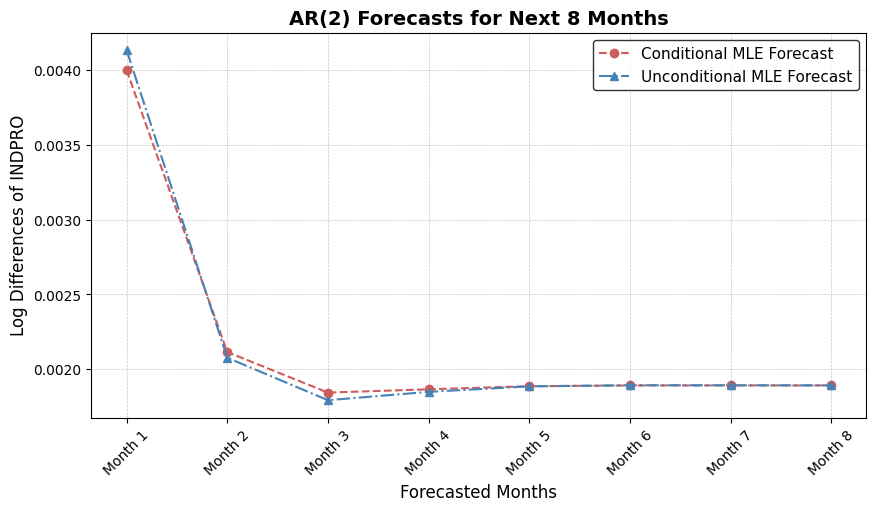

In [45]:
import matplotlib.pyplot as plt

# Create time index for forecasted months
forecast_months = [f"Month {i+1}" for i in range(8)]

# Create the plot
plt.figure(figsize=(10, 5))

# Plot Conditional MLE Forecast
plt.plot(forecast_months, forecast_conditional, 
         marker='o', markersize=6, color="indianred", linestyle='--', linewidth=1.5, 
         label="Conditional MLE Forecast")

# Plot Unconditional MLE Forecast
plt.plot(forecast_months, forecast_unconditional, 
         marker='^', markersize=6, color="steelblue", linestyle='-.', linewidth=1.5, 
         label="Unconditional MLE Forecast")

# Formatting the plot
plt.xlabel("Forecasted Months", fontsize=12)
plt.ylabel("Log Differences of INDPRO", fontsize=12)
plt.title("AR(2) Forecasts for Next 8 Months", fontsize=14, fontweight='bold')

# Improve grid visibility
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add a legend with a slight background for readability
plt.legend(fontsize=11, loc="upper right", frameon=True, edgecolor="black")

# Show the plot
plt.show()


Observations:

Forecasts are Converging Over Time

-The first forecasted periods show small differences between Conditional and Unconditional MLE, but from Month 4 onwards they stabilize.

-This suggests that the AR(2) structure quickly dampens variability in long-term forecasts.

Minimal Differences in Forecasting Approaches

-Early forecasts show slightly more deviation, indicating that short-term forecast differences stem from how each approach handles the initial values. 

Comparison of Forecast Accuracy based on Out-of-Sample Forecasting

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd 
 
# Generate Out-of-Sample Forecasts for 1 to 8 Periods Ahead
# Use the AR(2) model with Conditional and Unconditional MLE estimates

# Initialize empty lists for forecasts
forecast_conditional_out = []
forecast_unconditional_out = []

# Perform rolling out-of-sample forecasts
for i in range(1, 9):  # Forecasting 1 to 8 periods ahead
    forecast_conditional_out.append(forecast_ar2(params_con_mle, indpro_log_diff[:-i], periods=1)[0])
    forecast_unconditional_out.append(forecast_ar2(params_unc_mle, indpro_log_diff[:-i], periods=1)[0])
    
# Extract the last 8 months of actual data for evaluation
actual_values_out = indpro_log_diff[-8:] # Test Set (held-out data)  

# Compute RMSE and MAE for Out-of-Sample Forecasts  
rmse_conditional_out = np.sqrt(mean_squared_error(actual_values_out, forecast_conditional_out))
rmse_unconditional_out = np.sqrt(mean_squared_error(actual_values_out, forecast_unconditional_out))

mae_conditional_out = mean_absolute_error(actual_values_out, forecast_conditional_out)
mae_unconditional_out = mean_absolute_error(actual_values_out, forecast_unconditional_out)
# Include MAE (Mean Absolute Error) for an Additional Accuracy Metrics
# More interpretable than RMSE, as it shows the average absolute forecast error

# Compute RMSE Ratios (Relative to Conditional MLE as Benchmark)
rmse_ratio_unconditional = rmse_unconditional_out / rmse_conditional_out
# Add RMSE Ratios for Relative Performance Comparison
# If RMSE Ratio > 1 → Model performs worse than Conditional MLE.
# If RMSE Ratio < 1 → Model performs better than Conditional MLE.
# If RMSE Ratio ≈ 1 → Model performs similarly to Conditional MLE.

# Compute RMSE Percentage Improvement
rmse_improvement = (1 - rmse_ratio_unconditional) * 100  # Convert to percentage

# Create DataFrame for Out-of-Sample Forecast Accuracy
out_forecast_accuracy_df = pd.DataFrame({
    "Method": ["Conditional MLE", "Unconditional MLE"],
    "Out-of-Sample RMSE": [rmse_conditional_out, rmse_unconditional_out],
    "Out-of-Sample MAE": [mae_conditional_out, mae_unconditional_out],
    "RMSE Ratio (vs Conditional)": [1.0, rmse_ratio_unconditional],
    "Improvement vs Conditional (%)": [0.0, rmse_improvement]  # 0 for benchmark model
})

# Display the results
print("\n\033[1m=== Out-of-Sample Forecast Accuracy (RMSE, MAE & % Improvement) ===\033[0m") # Bold Title
print(out_forecast_accuracy_df)  



=== Out-of-Sample Forecast Accuracy (RMSE, MAE & % Improvement) ===
              Method  Out-of-Sample RMSE  Out-of-Sample MAE  \
0    Conditional MLE            0.005004           0.004364   
1  Unconditional MLE            0.004943           0.004298   

   RMSE Ratio (vs Conditional)  Improvement vs Conditional (%)  
0                     1.000000                         0.00000  
1                     0.987728                         1.22724  


Observations:

-Unconditional MLE shows a slight improvement in forecast accuracy.

-The difference is marginal (~1.23% better RMSE), suggesting that modeling the first two observations using their unconditional distribution does slightly improve forecasting performance.

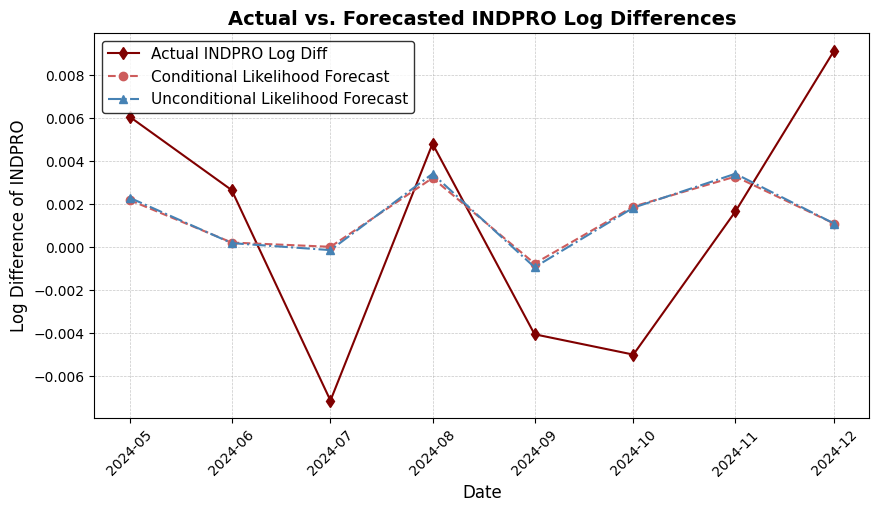

In [47]:
# Import Matplotlib for visualization

import matplotlib.pyplot as plt

# Define time index for the last 8 months
time_index = data_cleaned["sasdate"].iloc[-8:]

# Plot actual vs. forecasted values
plt.figure(figsize=(10, 5))
plt.plot(time_index, actual_values_out, marker='d', linestyle='-', label="Actual INDPRO Log Diff", color='maroon')
plt.plot(time_index, forecast_conditional_out, marker='o', linestyle='--', label="Conditional Likelihood Forecast", color='indianred')
plt.plot(time_index, forecast_unconditional_out, marker='^', linestyle='-.', label="Unconditional Likelihood Forecast", color='steelblue')

# Formatting the plot
plt.xlabel("Date", fontsize=12)
plt.ylabel("Log Difference of INDPRO", fontsize=12) 
plt.title("Actual vs. Forecasted INDPRO Log Differences", fontsize=14, fontweight="bold")

# Improve grid visibility
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add a legend with a slight background for readability
plt.legend(fontsize=11, loc="upper left", frameon=True, edgecolor="black")

# Show the plot
plt.show()


Graph Interpretation:

-The AR(2) model produces overly smooth forecasts that fail to capture the large fluctuations in INDPRO log differences.

-Forecasts lag behind actual turning points, indicating that the model lacks adaptability to sudden economic shifts.

-While the Unconditional MLE model slightly improves accuracy, neither model fully captures the underlying volatility in INDPRO log differences.  

Final Results 

In [ ]:
# Import tabulate for displaying tables in a more readable format 
from tabulate import tabulate

# Format Forecast results
forecast_table = tabulate(forecast_df, headers="keys", tablefmt="double_grid", numalign="center")

# Format Out-of-Sample Forecast Accuracy results
accuracy_table = tabulate(out_forecast_accuracy_df, headers="keys", tablefmt="double_grid", numalign="center")

# Display formatted tables
print("\n\033[1m=== 8-Month Forecasted INDPRO Log Differences ===\033[0m")  # Bold title
print(forecast_table)

print("\n\033[1m=== Out-of-Sample Forecast Accuracy (RMSE, MAE & % Improvement) ===\033[0m")  # Bold title
print(accuracy_table)   



=== 8-Month Forecasted INDPRO Log Differences ===
╔════╦═════════╦════════════════════════╦══════════════════════════╗
║    ║ Month   ║  Conditional Forecast  ║  Unconditional Forecast  ║
╠════╬═════════╬════════════════════════╬══════════════════════════╣
║ 0  ║ Month 1 ║       0.00400066       ║        0.00413477        ║
╠════╬═════════╬════════════════════════╬══════════════════════════╣
║ 1  ║ Month 2 ║       0.0021142        ║        0.00207612        ║
╠════╬═════════╬════════════════════════╬══════════════════════════╣
║ 2  ║ Month 3 ║       0.00184271       ║        0.00179184        ║
╠════╬═════════╬════════════════════════╬══════════════════════════╣
║ 3  ║ Month 4 ║       0.00186473       ║        0.00184756        ║
╠════╬═════════╬════════════════════════╬══════════════════════════╣
║ 4  ║ Month 5 ║       0.00188557       ║        0.00188442        ║
╠════╬═════════╬════════════════════════╬══════════════════════════╣
║ 5  ║ Month 6 ║       0.00189042       ║        0.0